In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import datetime as dt

In [2]:
# Load in the Zillow Home Value Index dataframe.
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
dff = pd.read_csv(url,low_memory=False)
dff

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [4]:
# Filter the 4 largest cities into a new dataframe.
filter_city=(dff["SizeRank"]==0)|(dff["SizeRank"]==1)|(dff["SizeRank"]==2)|(dff["SizeRank"]==3)
df=dff[filter_city].copy()
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [5]:
#Melt the data to long-form and prepare it for time series analysis
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [6]:
melted = pd.melt(df,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'], var_name="Date", value_name='ZHVI')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,ZHVI
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [7]:
melted['Date'] = pd.to_datetime(melted['Date'])
# Make the datetime column the index.
melted = melted.set_index("Date")
melted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2000-01-31 to 2022-09-30
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   ZHVI        1087 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 85.3+ KB


In [57]:
#Resample the dataframe as monthly frequency, grouped by City
df_ts = melted.groupby('RegionName').resample('M').last(numeric_only=True)
df_ts = df_ts.drop(['RegionID', 'SizeRank'],axis=1)
df_ts 

ZHVI
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

In [58]:
unstacked = df_ts.unstack(level=0)
unstacked

ZHVI                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [27]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

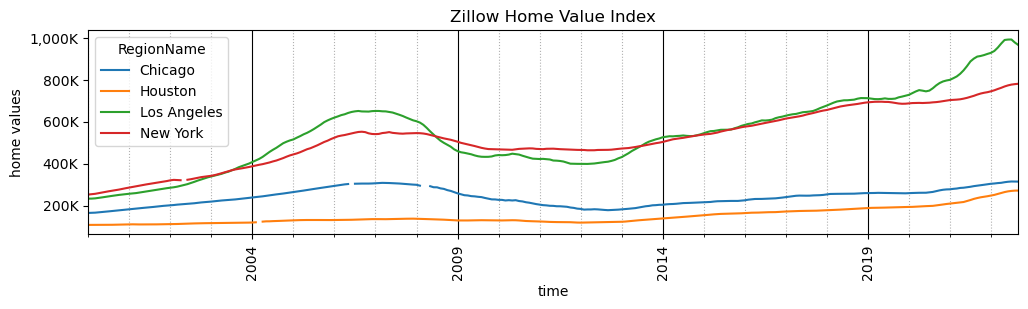

In [63]:
# Plot the home values for all 4 cities. 
fig, ax = plt.subplots(figsize=(12,3))
## creating our tick locators and formattersloc_month = mdates.MonthLocator(3)
loc_yearr = mdates.YearLocator(5)
fmt_yearr = mdates.DateFormatter("%Y")
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")
## customize minor ticks
ax.xaxis.set_minor_locator(loc_year)
ax.xaxis.set_minor_formatter(fmt_year)
## customize major ticks
ax.xaxis.set_major_locator(loc_yearr)
ax.xaxis.set_major_formatter(fmt_yearr)
unstacked['ZHVI'].plot(ax=ax, title='Zillow Home Value Index',ylabel='home values',xlabel='time')
ax.yaxis.set_major_formatter(fmt_thous)
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='black')
fig.autofmt_xdate(rotation=90,ha='center');

1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?>>>>New York had the highest (510309.0), Houston had the least (131283.0)

In [61]:
df_ts.loc[pd.IndexSlice[:, '2008'],:]

ZHVI
RegionName  Date                
Chicago     2008-01-31  300207.0
            2008-02-29  296063.0
            2008-03-31       NaN
            2008-04-30       NaN
            2008-05-31  293467.0
            2008-06-30  288495.0
            2008-07-31  288174.0
            2008-08-31  283199.0
            2008-09-30  280695.0
            2008-10-31  274849.0
            2008-11-30  271059.0
            2008-12-31  265306.0
Houston     2008-01-31  138208.0
            2008-02-29  137512.0
            2008-03-31  136795.0
            2008-04-30  136628.0
            2008-05-31  136228.0
            2008-06-30  135773.0
            2008-07-31  135392.0
            2008-08-31  134770.0
            2008-09-30  133932.0
            2008-10-31  133189.0
            2008-11-30  132247.0
            2008-12-31  131283.0
Los Angeles 2008-01-31  603029.0
            2008-02-29  596635.0
            2008-03-31  586065.0
            2008-04-30  571226.0
            2008-05-31  554589.0
            2008-06-30  539622.0
            2008-07-31  524220.0
            2008-08-31  510520.0
            2008-09-30  500124.0
            2008-10-31  490979.0
            2008-11-30  481905.0
            2008-12-31  469294.0
New York    2008-01-31  546538.0
            2008-02-29  546098.0
            2008-03-31  544562.0
            2008-04-30  541865.0
            2008-05-31  537685.0
            2008-06-30  533810.0
            2008-07-31  529211.0
            2008-08-31  525290.0
            2008-09-30  521347.0
            2008-10-31  518048.0
            2008-11-30  514767.0
            2008-12-31  510309.0

2) How much did the home values change from November 2008 to December 2008 (in dollars)?>>>>-5753.0	for Chicago, -964.0	for Houston, -12611.0 for Los Angeles, -4458.0 for New York

In [65]:
unstacked.diff().loc['2008',:]

ZHVI                             
RegionName Chicago Houston Los Angeles New York
Date                                           
2008-01-31  -928.0  -594.0     -4357.0    285.0
2008-02-29 -4144.0  -696.0     -6394.0   -440.0
2008-03-31     NaN  -717.0    -10570.0  -1536.0
2008-04-30     NaN  -167.0    -14839.0  -2697.0
2008-05-31     NaN  -400.0    -16637.0  -4180.0
2008-06-30 -4972.0  -455.0    -14967.0  -3875.0
2008-07-31  -321.0  -381.0    -15402.0  -4599.0
2008-08-31 -4975.0  -622.0    -13700.0  -3921.0
2008-09-30 -2504.0  -838.0    -10396.0  -3943.0
2008-10-31 -5846.0  -743.0     -9145.0  -3299.0
2008-11-30 -3790.0  -942.0     -9074.0  -3281.0
2008-12-31 -5753.0  -964.0    -12611.0  -4458.0